# Netflix Movie Data

This dataset contains more than 8,500 Netflix movies and TV shows, including cast members, duration, and genre. It contains titles added as recently as late September 2021.

Not sure where to begin? Scroll to the bottom to find challenges!

In [168]:
import pandas as pd

movies_df= pd.read_csv(r"/Users/iqrabismi/Desktop/workspace/netflix_dataset.csv", index_col=0)

In [169]:
movies_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


[Source](https://www.kaggle.com/shivamb/netflix-shows) of dataset.

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: How much variety exists in Netflix's offering? Base this on three variables: `type`, `country`, and `listed_in`.
- 📊 **Visualize**: Build a word cloud from the movie and TV shows descriptions. Make sure to remove stop words!
- 🔎 **Analyze**: Has Netflix invested more in certain genres (see `listed_in`) in recent years? What about certain age groups (see `ratings`)?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

A talent agency has hired you to analyze patterns in the professional relationships of cast members and directors. The key deliverable is a network graph where each node represents a cast member or director. An edge represents a movie or TV show worked on by both nodes in this undirected graph. You can limit the actors to the first four names listed in `cast`. The client is interested in any insights you can derive from your Netflix network analysis, such as actor/actor and actor/director pairs that work most closely together, most popular actors and directors to work with, and graph differences over time.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

## Data Preprocessing

In [170]:
movies_df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [171]:
movies_df.dropna(axis=0, inplace= True, how='any')

In [172]:
movies_df.isna().sum() # removing the nulls

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [173]:
# Checking for duplicates

In [174]:
len(movies_df[movies_df.duplicated()]) #Hence no duplicates

0

In [175]:
# checking the data dtypes

In [176]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, s8 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          5332 non-null   object
 1   title         5332 non-null   object
 2   director      5332 non-null   object
 3   cast          5332 non-null   object
 4   country       5332 non-null   object
 5   date_added    5332 non-null   object
 6   release_year  5332 non-null   int64 
 7   rating        5332 non-null   object
 8   duration      5332 non-null   object
 9   listed_in     5332 non-null   object
 10  description   5332 non-null   object
dtypes: int64(1), object(10)
memory usage: 499.9+ KB


In [179]:
#converting duration to string types
movies_df['duration']= movies_df['duration'].apply(lambda x: x.split()[0])


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [180]:
movies_df['duration'] = movies_df['duration'].astype('int64')

In [181]:
movies_df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
dtype: object

In [ ]:
## Converting date added to int

In [183]:
movies_df['date_added'] = pd.to_datetime(movies_df['date_added'])

### Data Quality Report for Numeric values

In [191]:
movies_dfstats1= movies_df.select_dtypes(include= ['int','float'])

In [192]:
movies_dfstats= pd.DataFrame(movies_df.describe().transpose())

In [193]:
movies_dfstats

,count,mean,std,min,25%,50%,75%,max
release_year,5332.0,2012.742123,9.625831,1942.0,2011.0,2016.0,2018.0,2021.0
duration,5332.0,99.922543,30.463724,1.0,88.0,100.0,116.0,253.0


#### Checking the cardinality for numeric features

In [195]:
cardinality=[]

for i in movies_dfstats1.columns:
    cardinality.append(movies_dfstats1[i].nunique())
  

In [196]:
movies_dfstats['cardinality'] = cardinality

In [197]:
movies_dfstats.columns= ['Count','Mean','Std Dev','Min','First Quart','Second Quart','Third Quart','Max', 'Cardinality']

In [198]:
movies_dfstats

,Count,Mean,Std Dev,Min,First Quart,Second Quart,Third Quart,Max,Cardinality
release_year,5332.0,2012.742123,9.625831,1942.0,2011.0,2016.0,2018.0,2021.0,72
duration,5332.0,99.922543,30.463724,1.0,88.0,100.0,116.0,253.0,196


### Data Quality Report for Categorical Variables

In [201]:
movies_df_categ= movies_df.select_dtypes(include= ['category','object'])

In [202]:
movies_df_categ_stats= pd.DataFrame(movies_df_categ.describe().transpose())

In [203]:
cardinality=[]

for i in movies_df_categ.columns:
    cardinality.append(movies_df_categ[i].nunique())
  

In [204]:
movies_df_categ_stats['cardinality']= cardinality

In [205]:
movies_df_categ_stats

,count,unique,top,freq,cardinality
type,5332,2,Movie,5185,2
title,5332,5332,Sankofa,1,5332
director,5332,3945,"Raúl Campos, Jan Suter",18,3945
cast,5332,5200,Samuel West,10,5200
country,5332,604,United States,1846,604
rating,5332,14,TV-MA,1822,14
listed_in,5332,335,"Dramas, International Movies",336,335
description,5332,5321,When pretty new neighbor Seema falls for their...,2,5321


In [211]:
 import statistics as stat

In [213]:
mode= []

for i in movies_df_categ.columns:
    mode.append(stat.mode(movies_df_categ[i]))
 

In [214]:
movies_df_categ_stats['mode']= mode

In [215]:
movies_df_categ_stats

,count,unique,top,freq,cardinality,mode
type,5332,2,Movie,5185,2,Movie
title,5332,5332,Sankofa,1,5332,Sankofa
director,5332,3945,"Raúl Campos, Jan Suter",18,3945,"Raúl Campos, Jan Suter"
cast,5332,5200,Samuel West,10,5200,Samuel West
country,5332,604,United States,1846,604,United States
rating,5332,14,TV-MA,1822,14,TV-MA
listed_in,5332,335,"Dramas, International Movies",336,335,"Dramas, International Movies"
description,5332,5321,When pretty new neighbor Seema falls for their...,2,5321,"With their biggest foe seemingly defeated, Inu..."


In [216]:
### Statistical Test to check relation between type and duration

In [219]:
import pingouin


In [ ]:
# Null Hypothesis: duration watched is independent of type 
#Alternate Hypothesis: people who watched TV show has more duration than people who watched movies
# significance is set at 0.01

In [220]:
movies_df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [221]:
a= movies_df[movies_df.type== 'Movie']['duration']

In [223]:
b= movies_df[movies_df.type== 'TV Show']['duration']

In [224]:
result = pingouin.ttest(a, b,correction=True)

/opt/anaconda3/lib/python3.9/site-packages/pingouin/bayesian.py:152: RuntimeWarning:

divide by zero encountered in double_scalars



In [225]:
result  ## from low values of p tells us that duration depends on type of show ie. movies or Tv shows

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,252.178996,2736.987735,two-sided,0.0,"[100.01, 101.58]",3.936264,inf,1.0


### Statistical Test to check relation between rating and duration

In [ ]:
# Null Hypothesis: duration watched is independent of rating 
#Alternate Hypothesis: duration watched is dependent of rating 
# significance is set at 0.05

In [228]:
results=pingouin.pairwise_tests(data=movies_df,dv="duration",between="rating",padjust="bonf")

In [234]:
results['p-unc'] = results['p-unc'].astype('float64')

In [235]:
results.dtypes

Contrast        object
A               object
B               object
Paired            bool
Parametric        bool
T              float64
dof            float64
alternative     object
p-unc          float64
p-corr         float64
p-adjust        object
BF10            object
hedges         float64
dtype: object

In [237]:
results[results['p-unc'] < 0.05] # relation between different ratings & duration

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
3,rating,G,PG-13,False,True,-4.021646,42.808570,two-sided,2.304412e-04,2.097015e-02,bonf,294.555,-0.842440
4,rating,G,R,False,True,-3.518190,41.135981,two-sided,1.075346e-03,9.785649e-02,bonf,52.697,-0.760456
5,rating,G,TV-14,False,True,-4.396194,43.575559,two-sided,6.970033e-05,6.342730e-03,bonf,1367.459,-0.546214
9,rating,G,TV-Y,False,True,7.894357,79.809884,two-sided,1.320048e-11,1.201244e-09,bonf,3.084e+09,1.529216
10,rating,G,TV-Y7,False,True,5.729046,97.269361,two-sided,1.128581e-07,1.027008e-05,bonf,1.366e+05,1.031697
12,rating,G,UR,False,True,-2.682320,10.936035,two-sided,2.141685e-02,1.000000e+00,bonf,4.378,-0.553077
26,rating,NR,PG-13,False,True,-4.661534,71.419218,two-sided,1.420051e-05,1.292247e-03,bonf,3715.917,-0.654220
27,rating,NR,R,False,True,-3.927875,65.004161,two-sided,2.099965e-04,1.910968e-02,bonf,207.627,-0.555446
28,rating,NR,TV-14,False,True,-5.212013,74.494889,two-sided,1.611788e-06,1.466728e-04,bonf,5.399e+04,-0.428143
29,rating,NR,TV-G,False,True,3.296409,136.232071,two-sided,1.248850e-03,1.136453e-01,bonf,23.255,0.510321


## EDA

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

### Top Directors

In [239]:
movies_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [246]:
movies_df['listed_in'] = movies_df['listed_in'].str.split(',')

In [247]:
movies_df= movies_df.explode('listed_in')

In [255]:
director= movies_df.groupby('director')['listed_in'].count()
director= director.reset_index()
director= director.sort_values('listed_in', ascending=False)


In [256]:
## top ten directors based on number of shows 

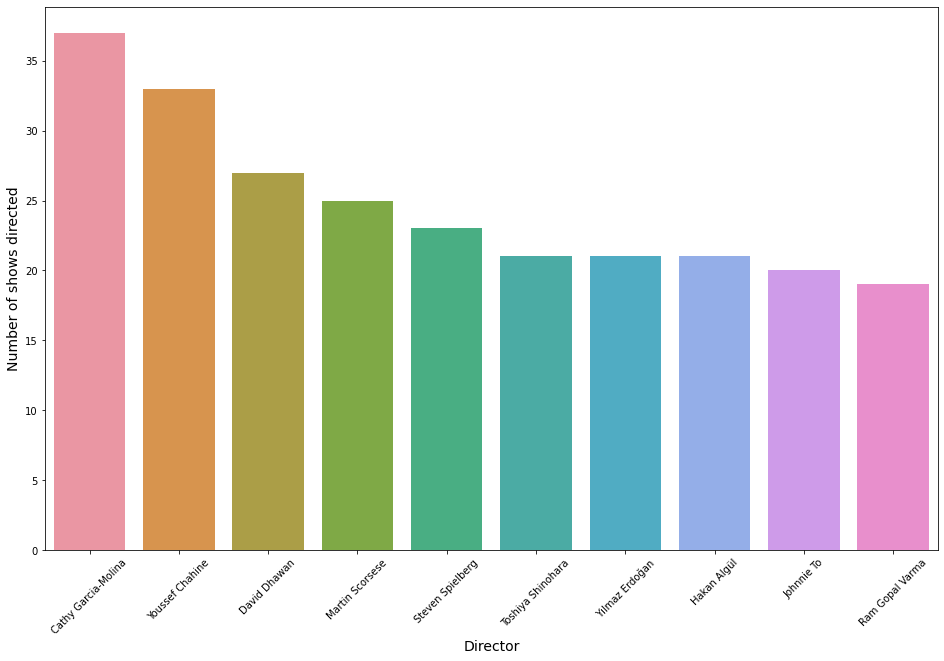

In [274]:
plt.figure(figsize= (16,10))
sns.set_palette("plasma")
sns.barplot(data= director.head(10), x='director', y='listed_in')
plt.xlabel('Director', size= 14)
plt.xticks(rotation = 45)
plt.ylabel('Number of shows directed', size= 14)
plt.show()

### Movie Vs Tv Show

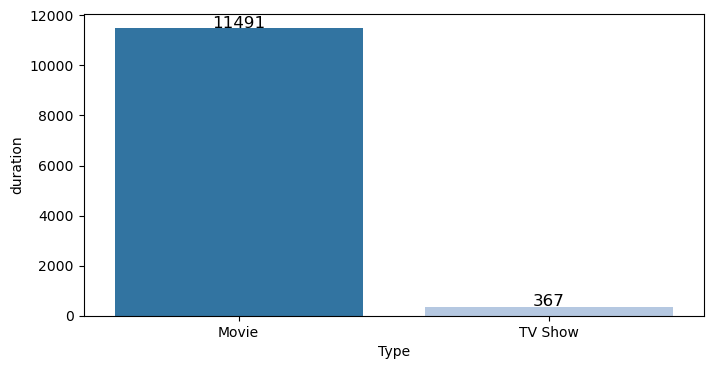

In [290]:
plt.figure(figsize=(8,4), dpi=100)
graph= sns.countplot(data= movies_df, x='type', palette= 'tab20')
plt.xlabel('Type')
plt.ylabel('duration')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height , ha="center", fontsize=12)

plt.show()

### Number of  shows in Countries 

In [291]:
movies_df['country'] = movies_df['country'].str.split(',')

In [292]:
movies_df= movies_df.explode('country')

In [294]:
country= movies_df.groupby('country')['listed_in'].count()
country= country.reset_index()
country= country.sort_values('listed_in', ascending=False)

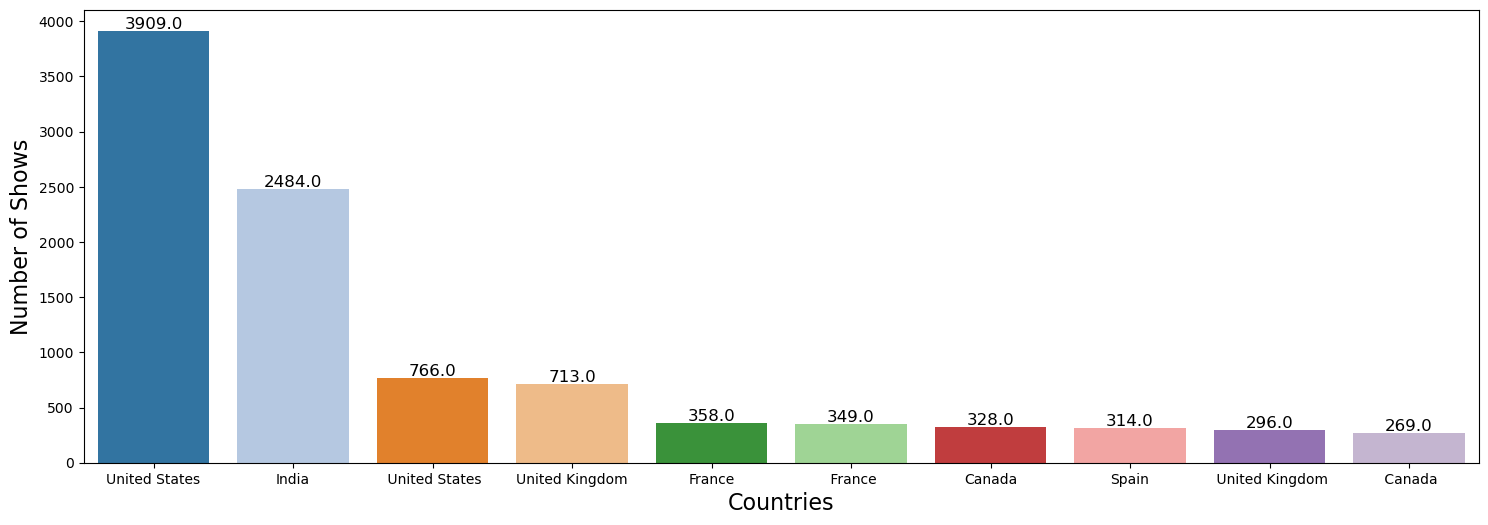

In [300]:
plt.figure(figsize=(18,6), dpi=100)
graph= sns.barplot(data= country.head(10), x='country', palette= 'tab20', y= 'listed_in')
plt.xlabel('Countries', size= 16)
plt.ylabel('Number of Shows', size= 16)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height , ha="center", fontsize=12)

plt.show()

### Number of shows in various Genres(listed_in)

In [309]:
genre= movies_df.listed_in.value_counts( ascending=False).reset_index()

In [310]:
genre

,index,listed_in
0,International Movies,2901
1,Dramas,2104
2,Comedies,1280
3,Action & Adventure,1124
4,Independent Movies,994
...,...,...
65,LGBTQ Movies,1
66,Romantic TV Shows,1
67,TV Dramas,1
68,TV Horror,1


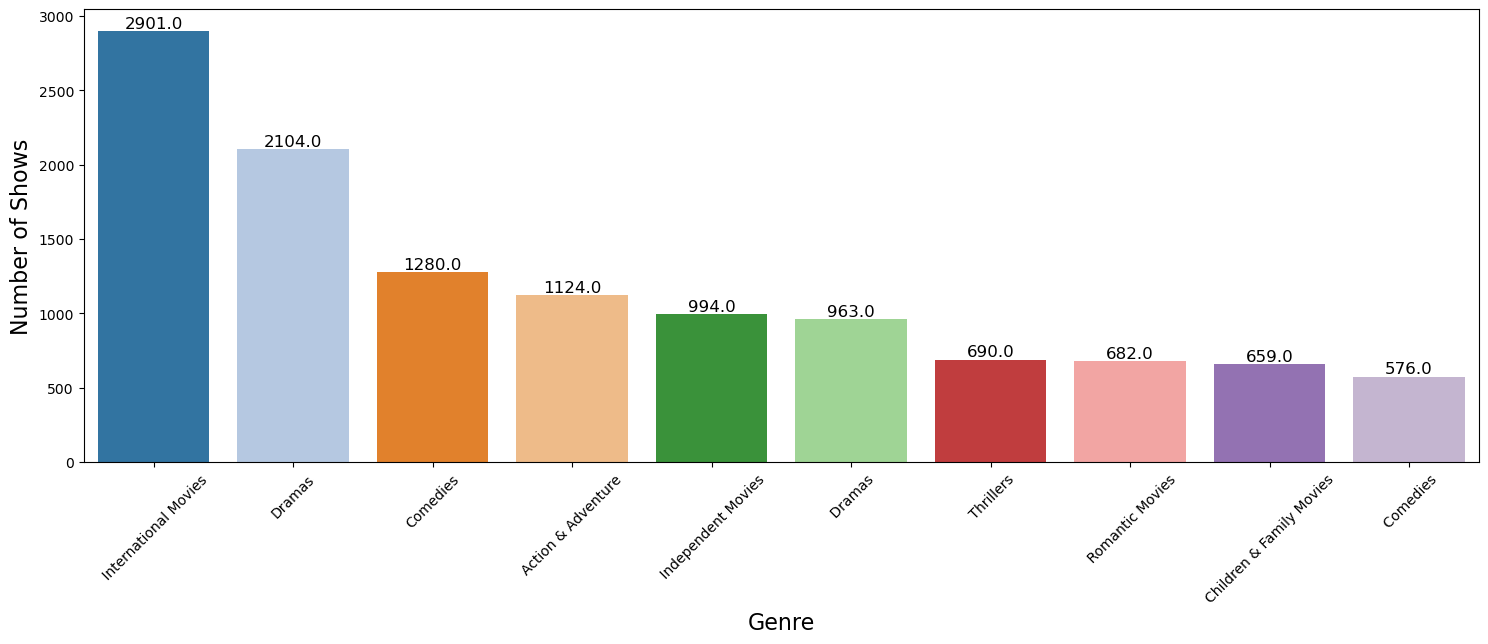

In [313]:
plt.figure(figsize=(18,6), dpi=100)
graph= sns.barplot(data= genre.head(10), x='index', palette= 'tab20', y= 'listed_in')
plt.xlabel('Genre', size= 16)
plt.xticks(rotation= 45)
plt.ylabel('Number of Shows', size= 16)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height , ha="center", fontsize=12)

plt.show()

### Distribution for duration of movies 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='duration', ylabel='Density'>

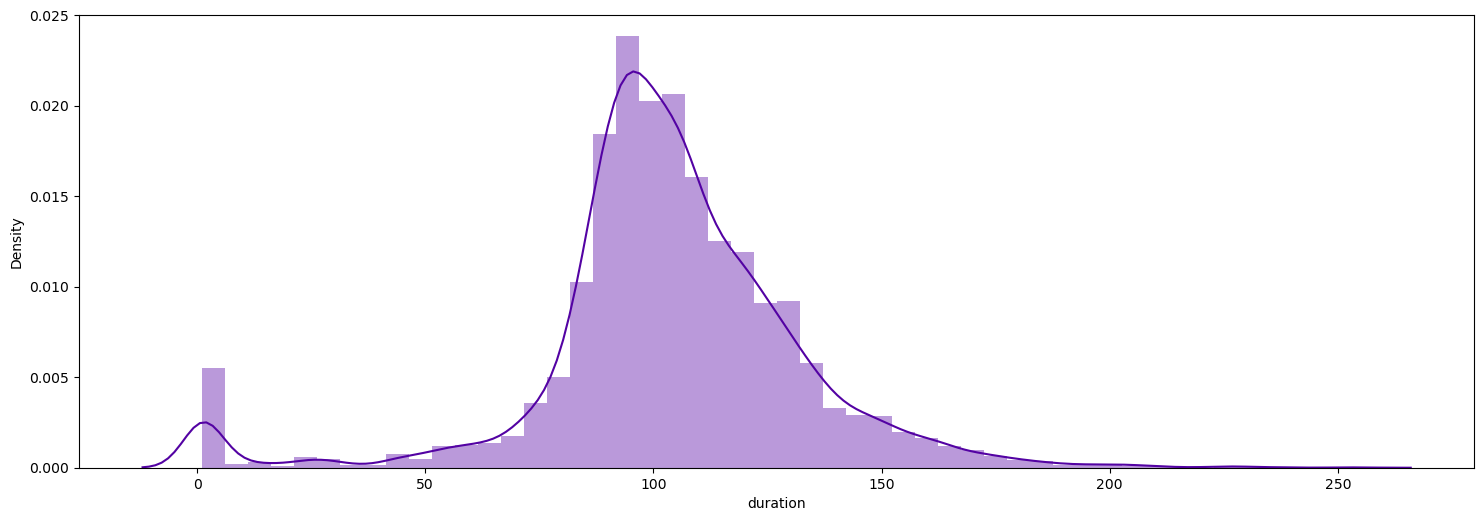

In [320]:
plt.figure(figsize=(18,6), dpi=100)
sns.distplot(movies_df['duration'], kde=True)

In [ ]:
# there are two groups with normal distribution. This might be for tv shows and movies 

In [352]:
duration= movies_df['duration'].values

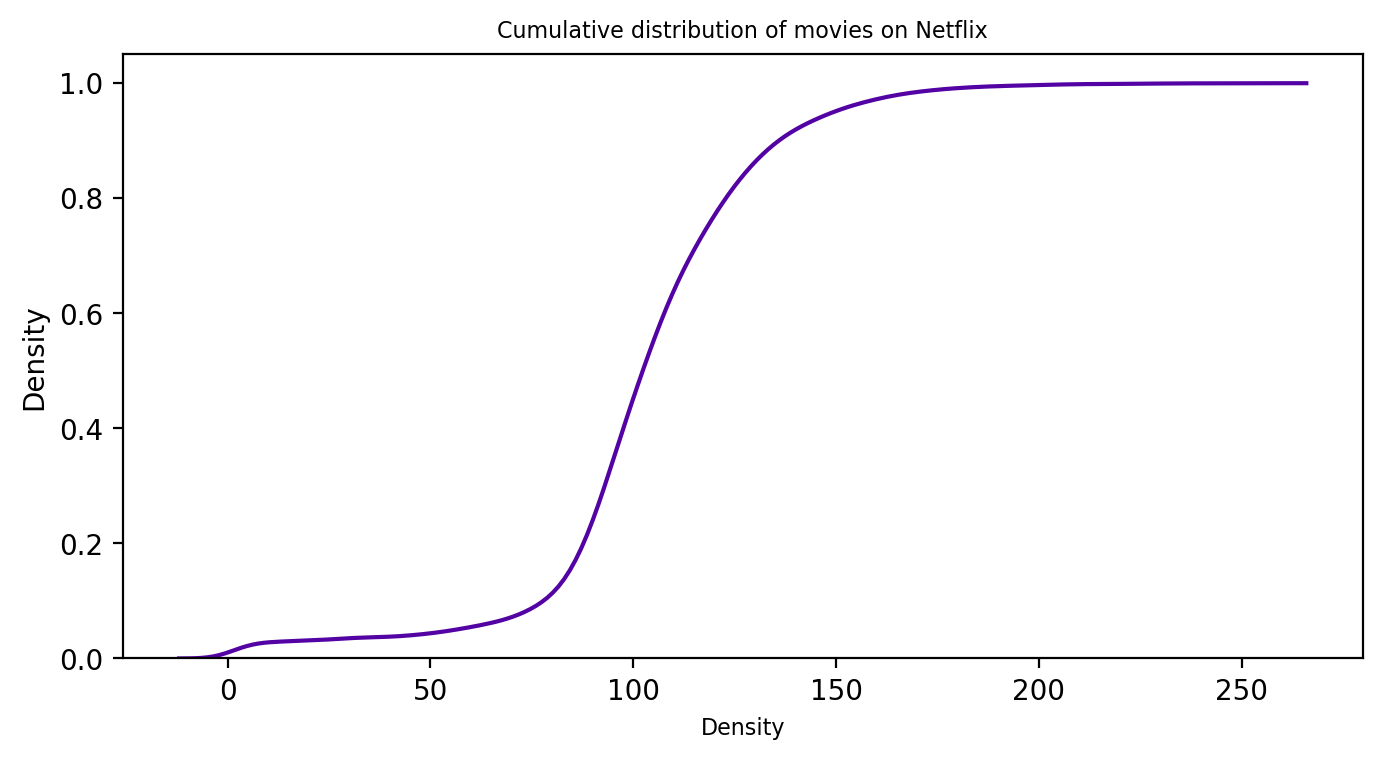

In [363]:
plt.figure(figsize=(8,4), dpi=200)
sns.kdeplot(duration, cumulative=True)
plt.xlabel('Duration in minutes', fontsize=8)
plt.title('Cumulative distribution of movies on Netflix', fontsize=8)
plt.xlabel('Density', fontsize=8)
plt.show()

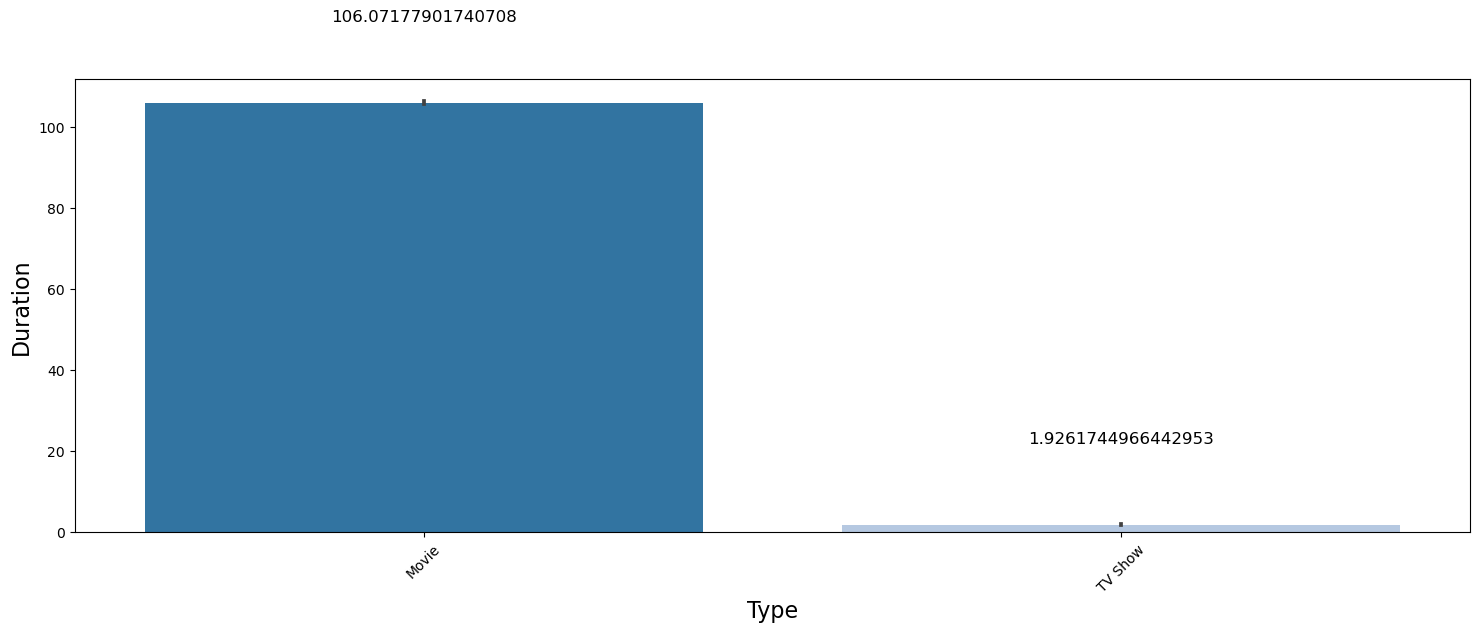

In [327]:
plt.figure(figsize=(18,6), dpi=100)
graph= sns.barplot(data= movies_df, x= 'type', y='duration', palette= 'tab20')
plt.xlabel('Type', size= 16)
plt.xticks(rotation= 45)
plt.ylabel('Duration', size= 16)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height, ha="center", fontsize=12)

plt.show()

### Most Common Seasons in TV Shows

In [400]:
season= movies_df[movies_df['type']=='TV Show']

In [401]:
season= season.groupby('title')['release_year'].count().reset_index()
season.columns= ['title', 'count']

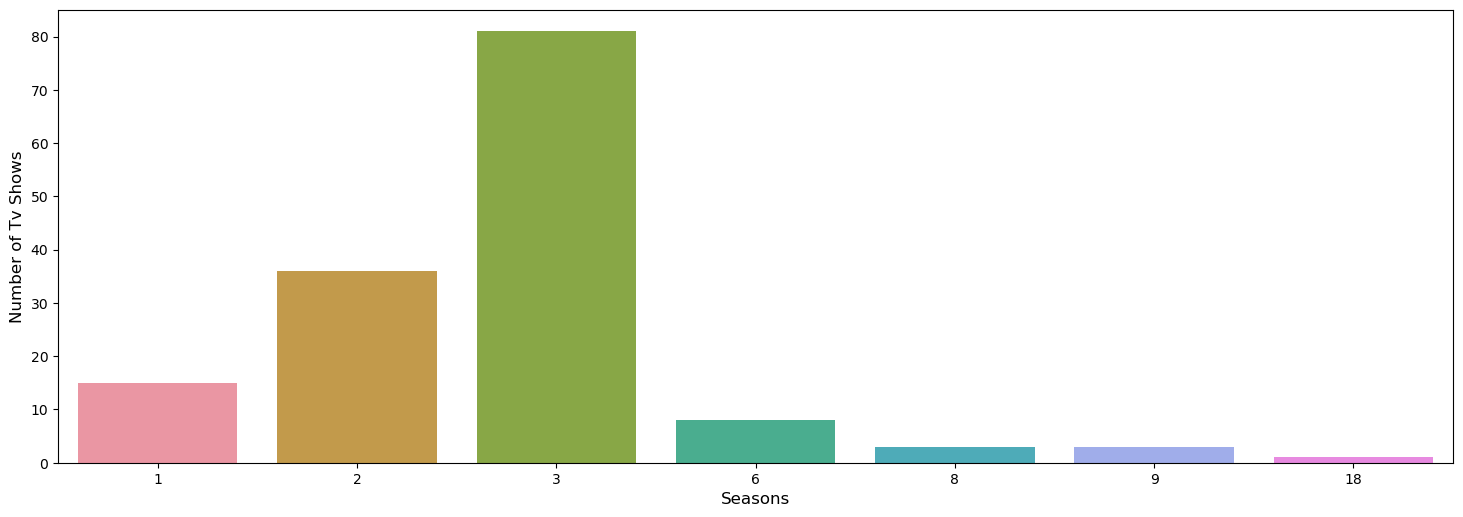

In [402]:
plt.figure(figsize=(18,6), dpi=100)
sns.countplot(data= season, x='count')
plt.xlabel('Seasons', size= 12)
plt.ylabel('Number of Tv Shows', size= 12)
plt.show()

In [ ]:
## Most shows have three seasons 

### Top ten TV Shows with most  seasons

In [420]:
season= season.sort_values('count', ascending=False)

Text(0, 0.5, 'Title')

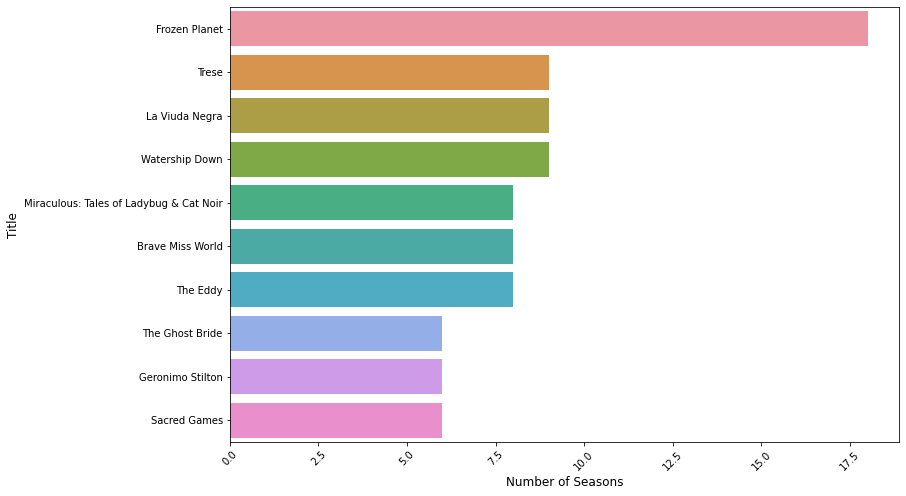

In [428]:
plt.figure(figsize=(12,8))
sns.barplot(data= season.head(10), x='count', y='title')
plt.xticks(rotation= 45)
plt.xlabel('Number of Seasons', size= 12)
plt.ylabel('Title', size= 12)

### Most Common Genre for last ten years

In [438]:
import numpy as np

In [456]:
genre= movies_df.groupby(['release_year','listed_in'])['title'].count().reset_index()

In [457]:
genre= genre[genre['release_year'].between(2000,2021, inclusive=True)]

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_16209/365991879.py:1: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



In [460]:
genre= genre.sort_values('title', ascending=False)

In [461]:
genre

,release_year,listed_in,title
973,2018,International Movies,387
883,2016,International Movies,360
927,2017,International Movies,342
1000,2018,Dramas,284
906,2016,Dramas,270
...,...,...,...
555,2005,Faith & Spirituality,1
552,2005,Anime Features,1
551,2004,Movies,1
549,2004,Independent Movies,1


<AxesSubplot:xlabel='release_year', ylabel='title'>

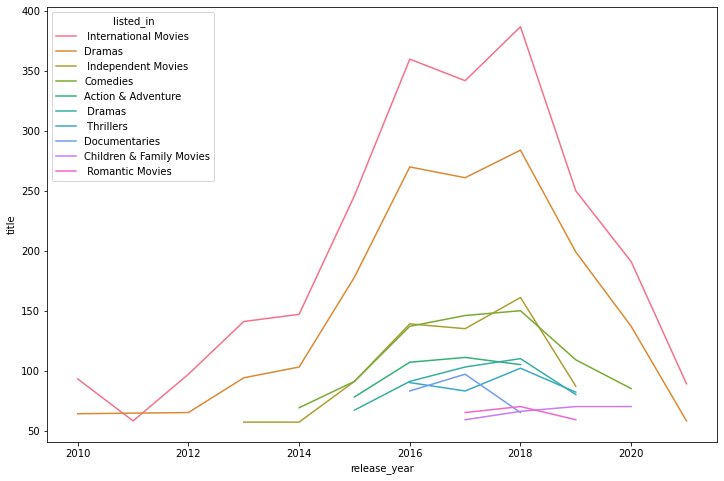

In [468]:
plt.figure(figsize=(12,8))
sns.lineplot(data= genre.head(60), x= 'release_year', y= 'title', hue='listed_in' )


In [ ]:
## International movies and drama was most commong genre

### Movie and TV genre for last ten years

In [469]:
genre

,release_year,listed_in,title
973,2018,International Movies,387
883,2016,International Movies,360
927,2017,International Movies,342
1000,2018,Dramas,284
906,2016,Dramas,270
...,...,...,...
555,2005,Faith & Spirituality,1
552,2005,Anime Features,1
551,2004,Movies,1
549,2004,Independent Movies,1


In [556]:
movie = genre[genre.listed_in.str.contains('Movies')]
tvshow= genre[genre.listed_in.str.contains('Movies')==False]

In [477]:
print('number of movies in last ten years were ', len(movie))
print('number of tv shows in last ten years were ', len(tvshow))


number of movies in last ten years were  231
number of tv shows in last ten years were  470


### Top ten movie genre on netflix

In [562]:
movie=movie.groupby('listed_in')['title'].sum().sort_values(ascending=False).reset_index()

Text(0, 0.5, 'Number of Shows')

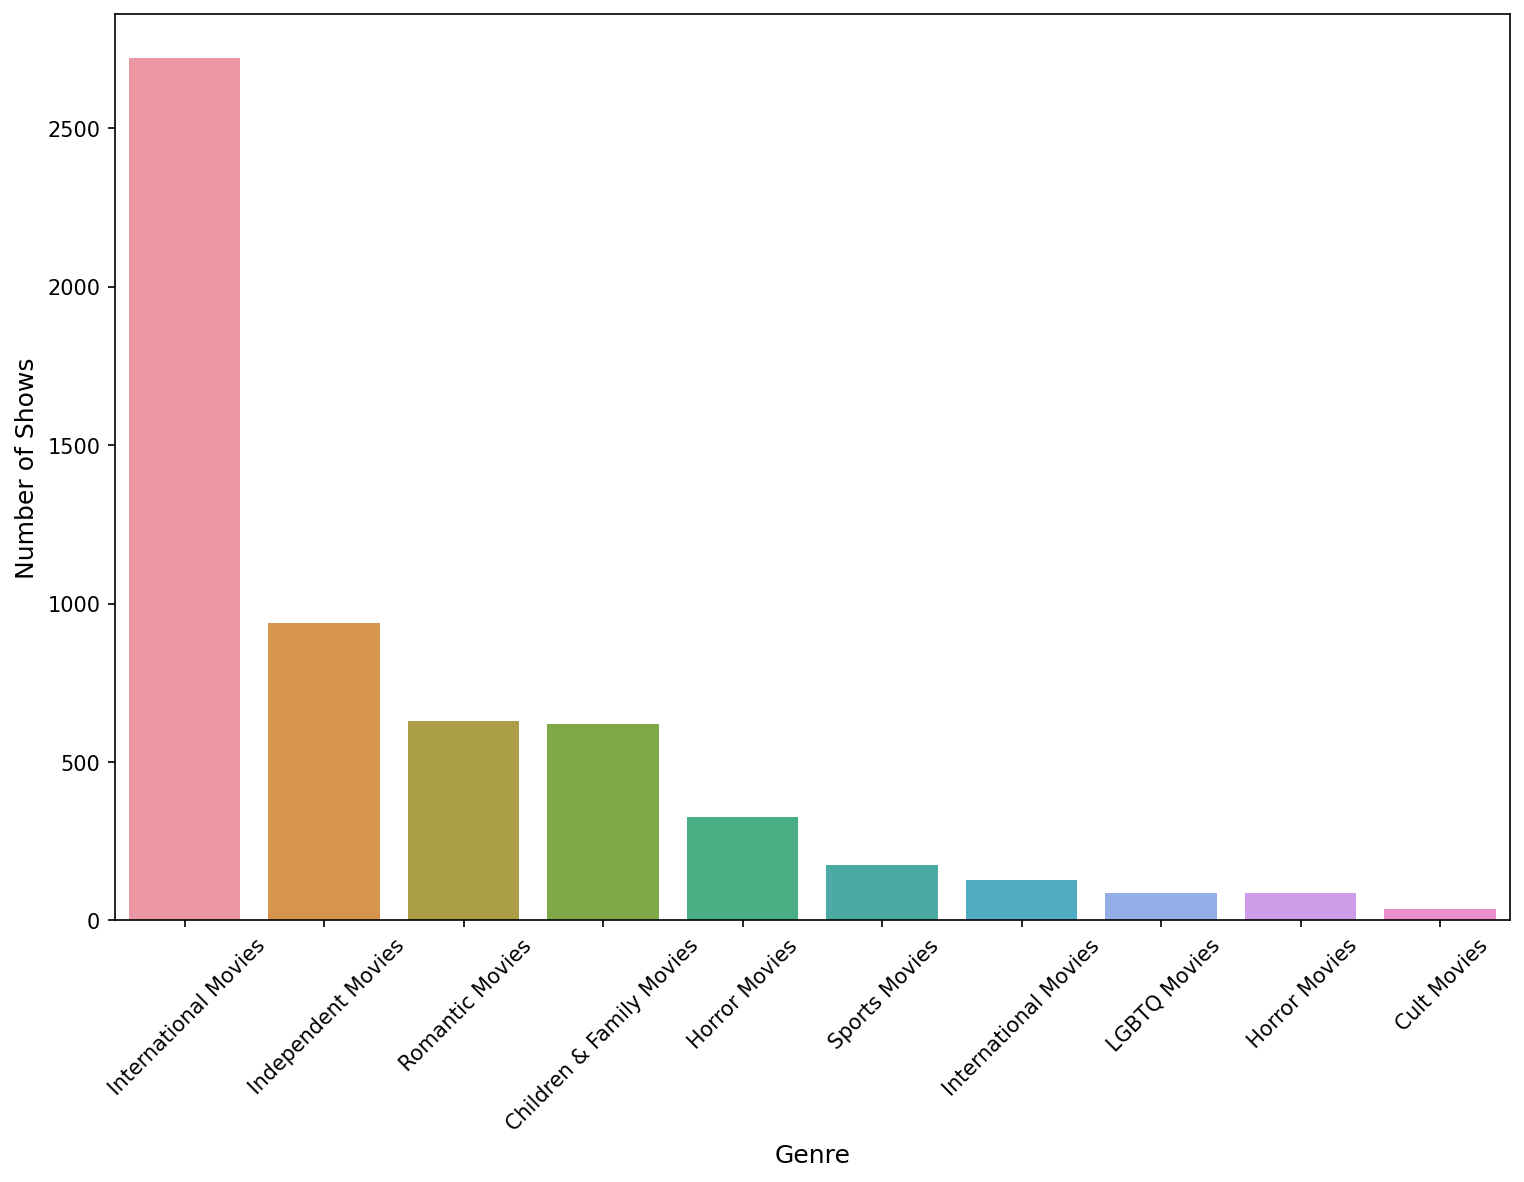

In [563]:
plt.figure(figsize=(12,8), dpi=150)
graph= sns.barplot(data= movie.head(10), x= 'listed_in', y= 'title')
plt.xticks(rotation=45)
plt.xlabel('Genre', size= 12)
plt.ylabel('Number of Shows', size= 12)

### Top ten Tv Show Genre

In [557]:
tvshow=tvshow.groupby('listed_in')['title'].sum().sort_values(ascending=False).reset_index()

Text(0, 0.5, 'Number of Shows')

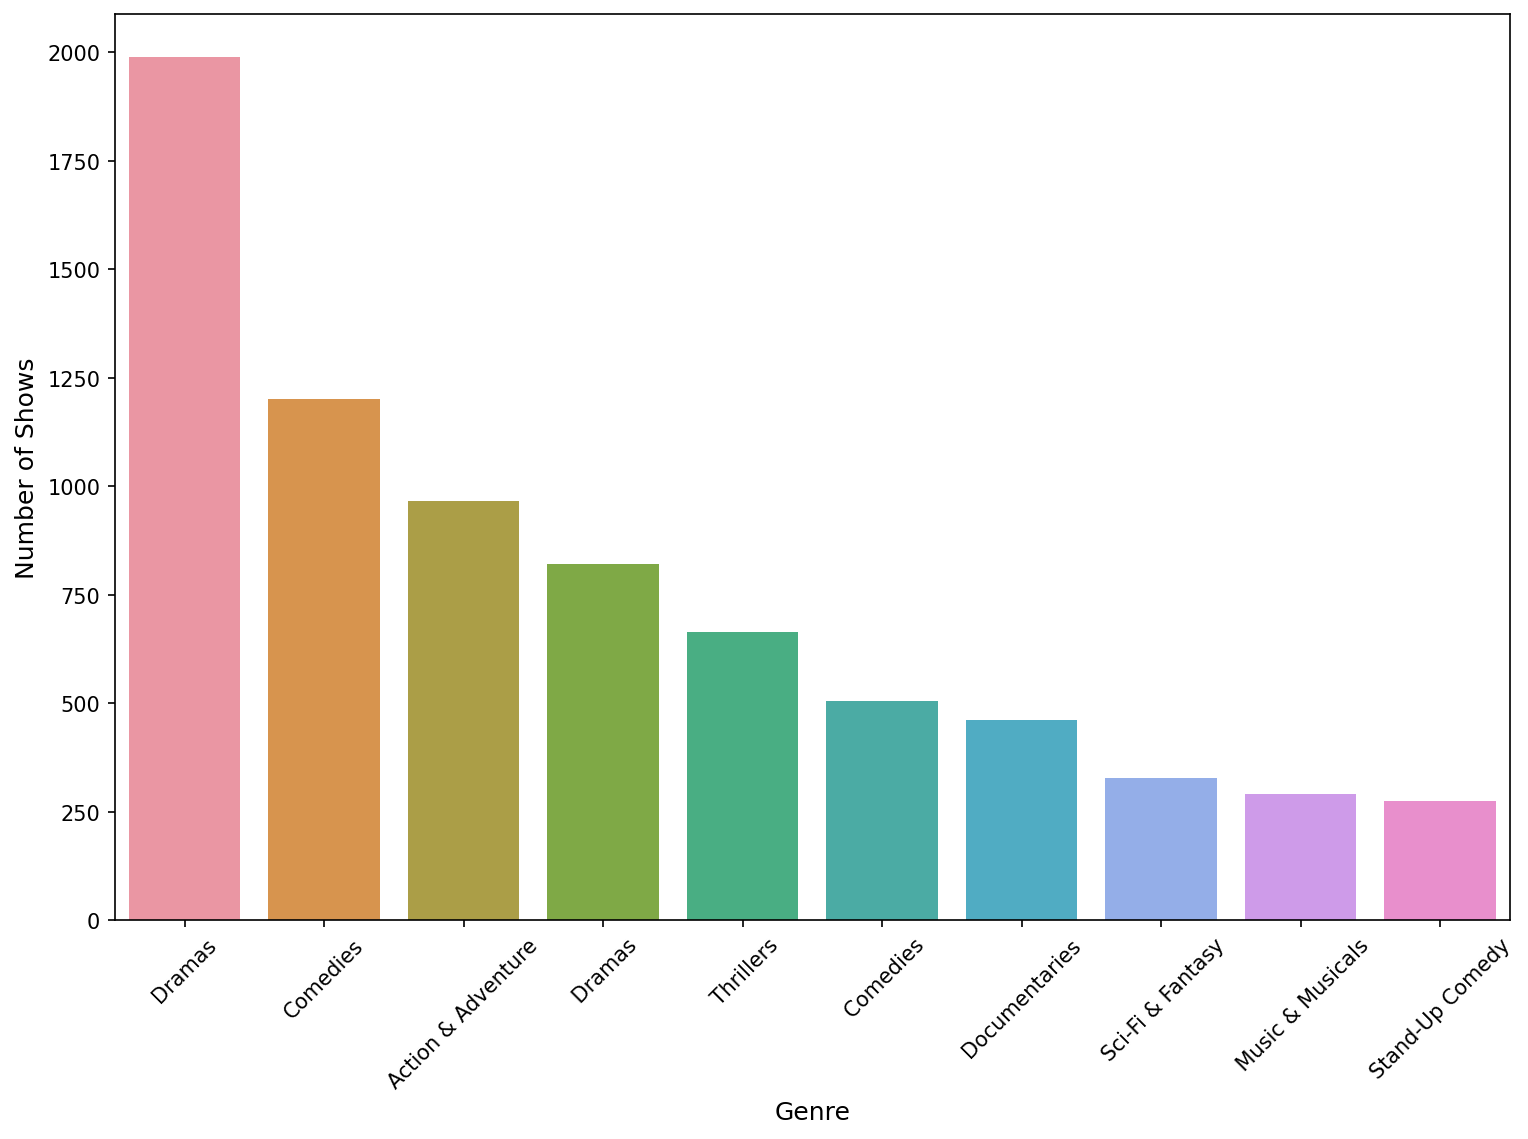

In [561]:
plt.figure(figsize=(12,8), dpi=150)
graph= sns.barplot(data= tvshow.head(10), x= 'listed_in', y= 'title')
plt.xticks(rotation=45)
plt.xlabel('Genre', size= 12)
plt.ylabel('Number of Shows', size= 12)

### Most common ratings

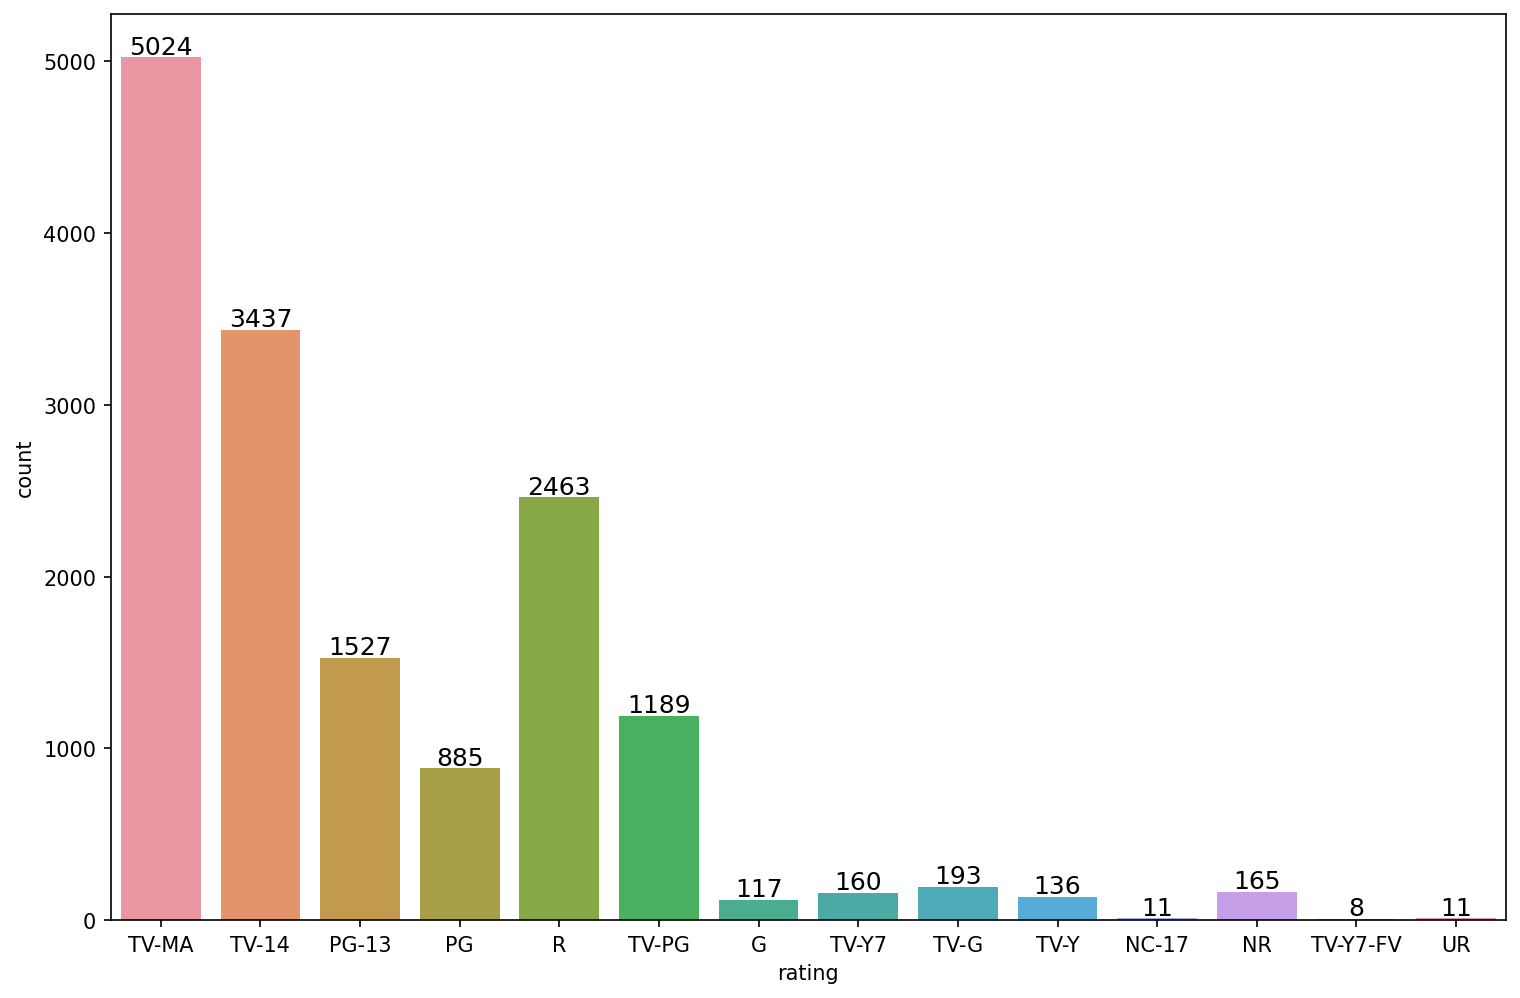

In [481]:
plt.figure(figsize=(12,8), dpi=150)
graph= sns.countplot(data= movies_df, x='rating')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height , ha="center", fontsize=12)

### Top ten Director with most movies 

In [519]:
d1= movies_df.query('type=="TV Show"')

In [521]:
d1['director']= d1['director'].str.split(',')

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_16209/3052655170.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [523]:
d1=d1.explode('director')

In [524]:
d1= d1.director.value_counts(ascending=False).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Alastair Fothergill'),
  Text(1, 0, 'Noam Murro'),
  Text(2, 0, 'Jay Oliva'),
  Text(3, 0, 'Alejandro Lozano'),
  Text(4, 0, ' Alan Poul'),
  Text(5, 0, ' Laïla Marrakchi'),
  Text(6, 0, ' Houda Benyamina'),
  Text(7, 0, 'Damien Chazelle'),
  Text(8, 0, 'Thomas Astruc'),
  Text(9, 0, 'Cecilia Peck')])

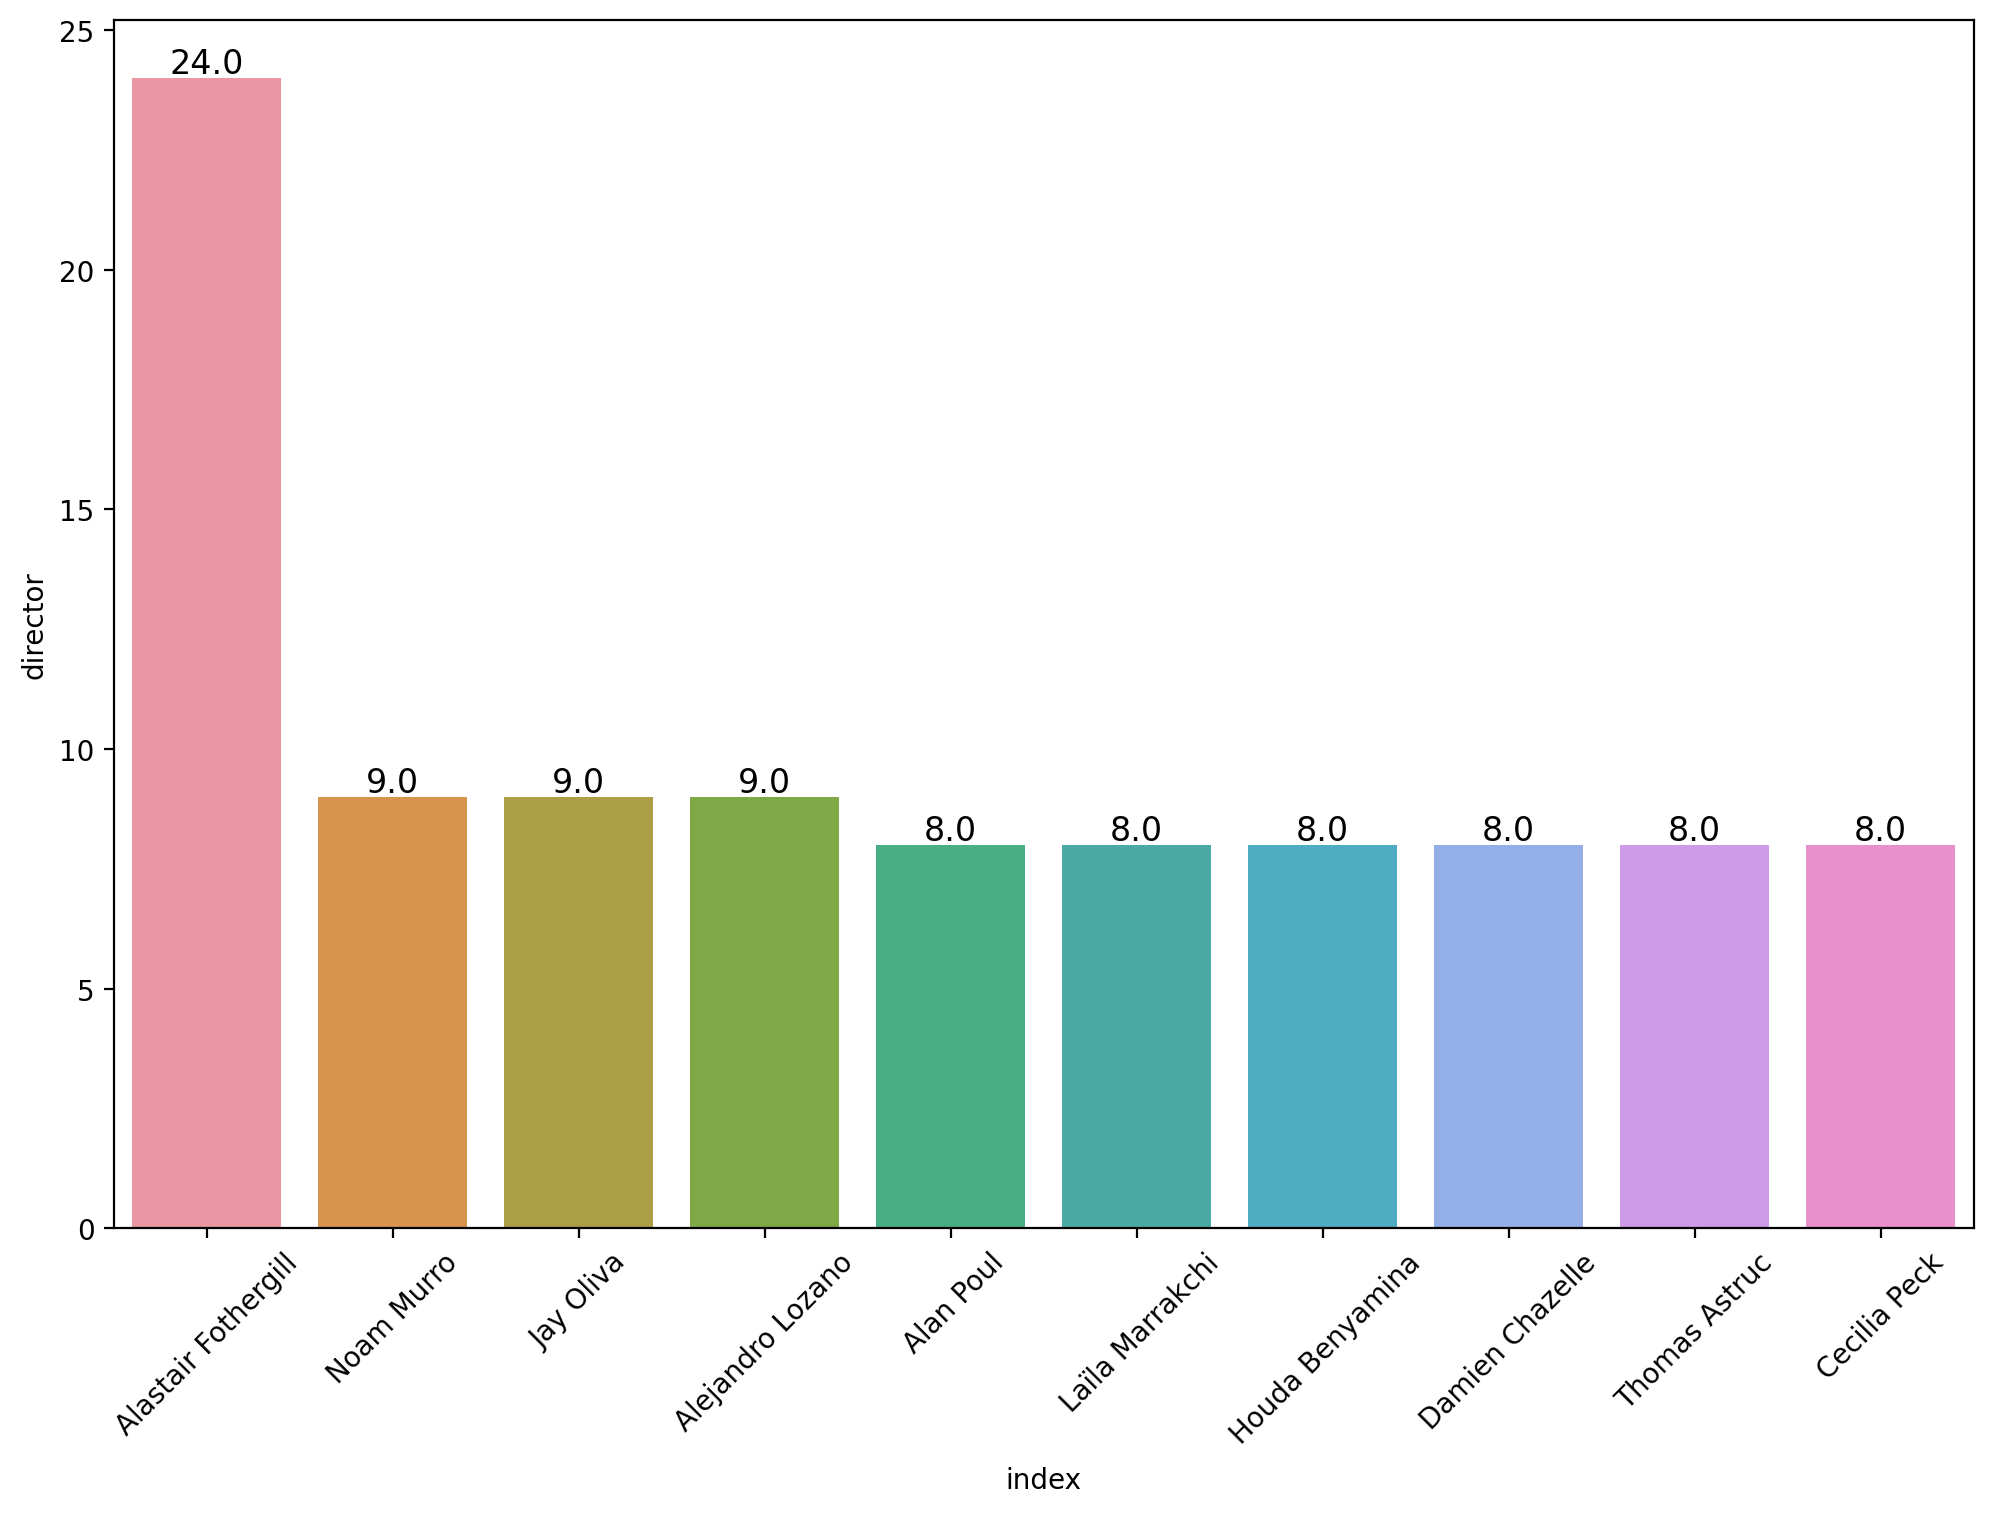

In [526]:
plt.figure(figsize = (12,8), dpi=200)
graph= sns.barplot(data= d1.head(10), x='index', y='director')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height+0.1 , height , ha="center", fontsize=12)
plt.xticks(rotation= 45)

### Top ten Director with most  Tv shows

In [535]:
d2= movies_df.query('type=="Movie"')

In [537]:
d2['director']= d2['director'].str.split(',')

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_16209/2842177677.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [538]:
d2=d2.explode('director')

In [539]:
d2= d2.director.value_counts(ascending=False).reset_index()

In [540]:
d2

,index,director
0,Youssef Chahine,46
1,Cathy Garcia-Molina,37
2,Martin Scorsese,36
3,Lars von Trier,33
4,Steven Spielberg,32
...,...,...
4252,Craig Gillespie,1
4253,Alexandre Heboyan,1
4254,Benoît Philippon,1
4255,Alex Coletti,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Youssef Chahine'),
  Text(1, 0, 'Cathy Garcia-Molina'),
  Text(2, 0, 'Martin Scorsese'),
  Text(3, 0, 'Lars von Trier'),
  Text(4, 0, 'Steven Spielberg'),
  Text(5, 0, 'Tom Hooper'),
  Text(6, 0, 'Olivier Assayas'),
  Text(7, 0, 'Don Michael Paul'),
  Text(8, 0, 'Johnnie To'),
  Text(9, 0, 'David Dhawan')])

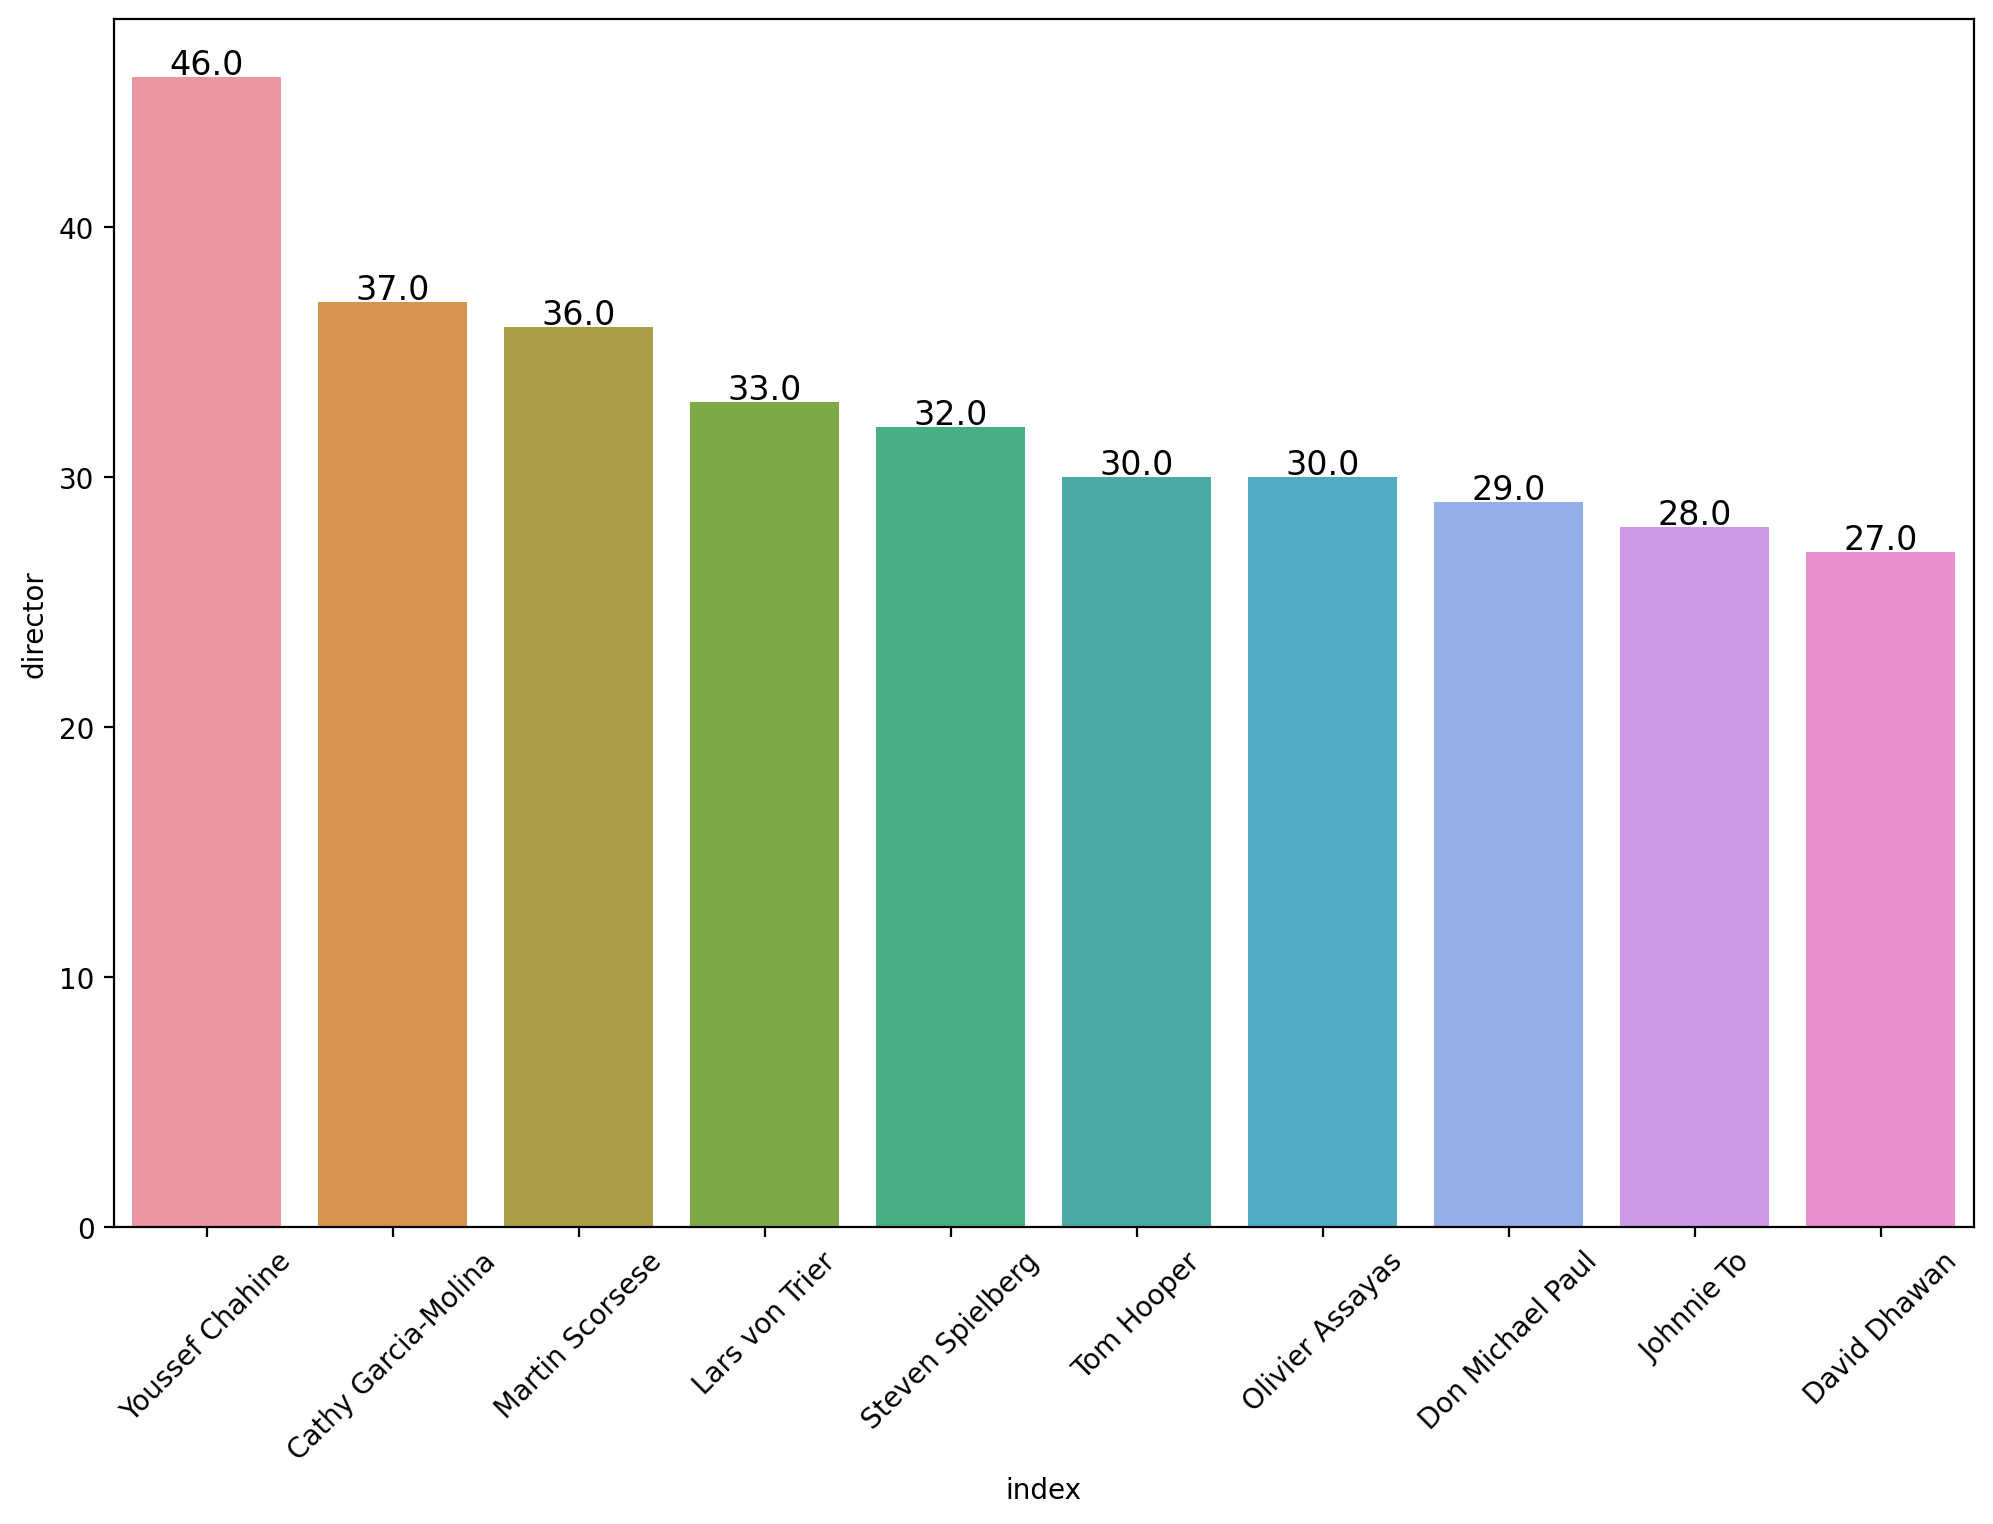

In [541]:
plt.figure(figsize = (12,8), dpi=200)
graph= sns.barplot(data= d2.head(10), x='index', y='director')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height+0.1 , height , ha="center", fontsize=12)
plt.xticks(rotation= 45)

### Top ten Casted Actors

In [564]:
movies_df['cast'] = movies_df.cast.str.split(',')

In [565]:
movies= movies.explode('cast')

In [566]:
cast= movies.cast.value_counts(ascending=False).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Samuel West'),
  Text(1, 0, 'Jeff Dunham'),
  Text(2, 0, 'Kevin Hart'),
  Text(3, 0, 'Bill Burr'),
  Text(4, 0, 'Jim Gaffigan'),
  Text(5, 0, 'Jerry Seinfeld'),
  Text(6, 0, 'Bill Hicks'),
  Text(7, 0, 'Iliza Shlesinger'),
  Text(8, 0, 'Vir Das'),
  Text(9, 0, 'David Attenborough')])

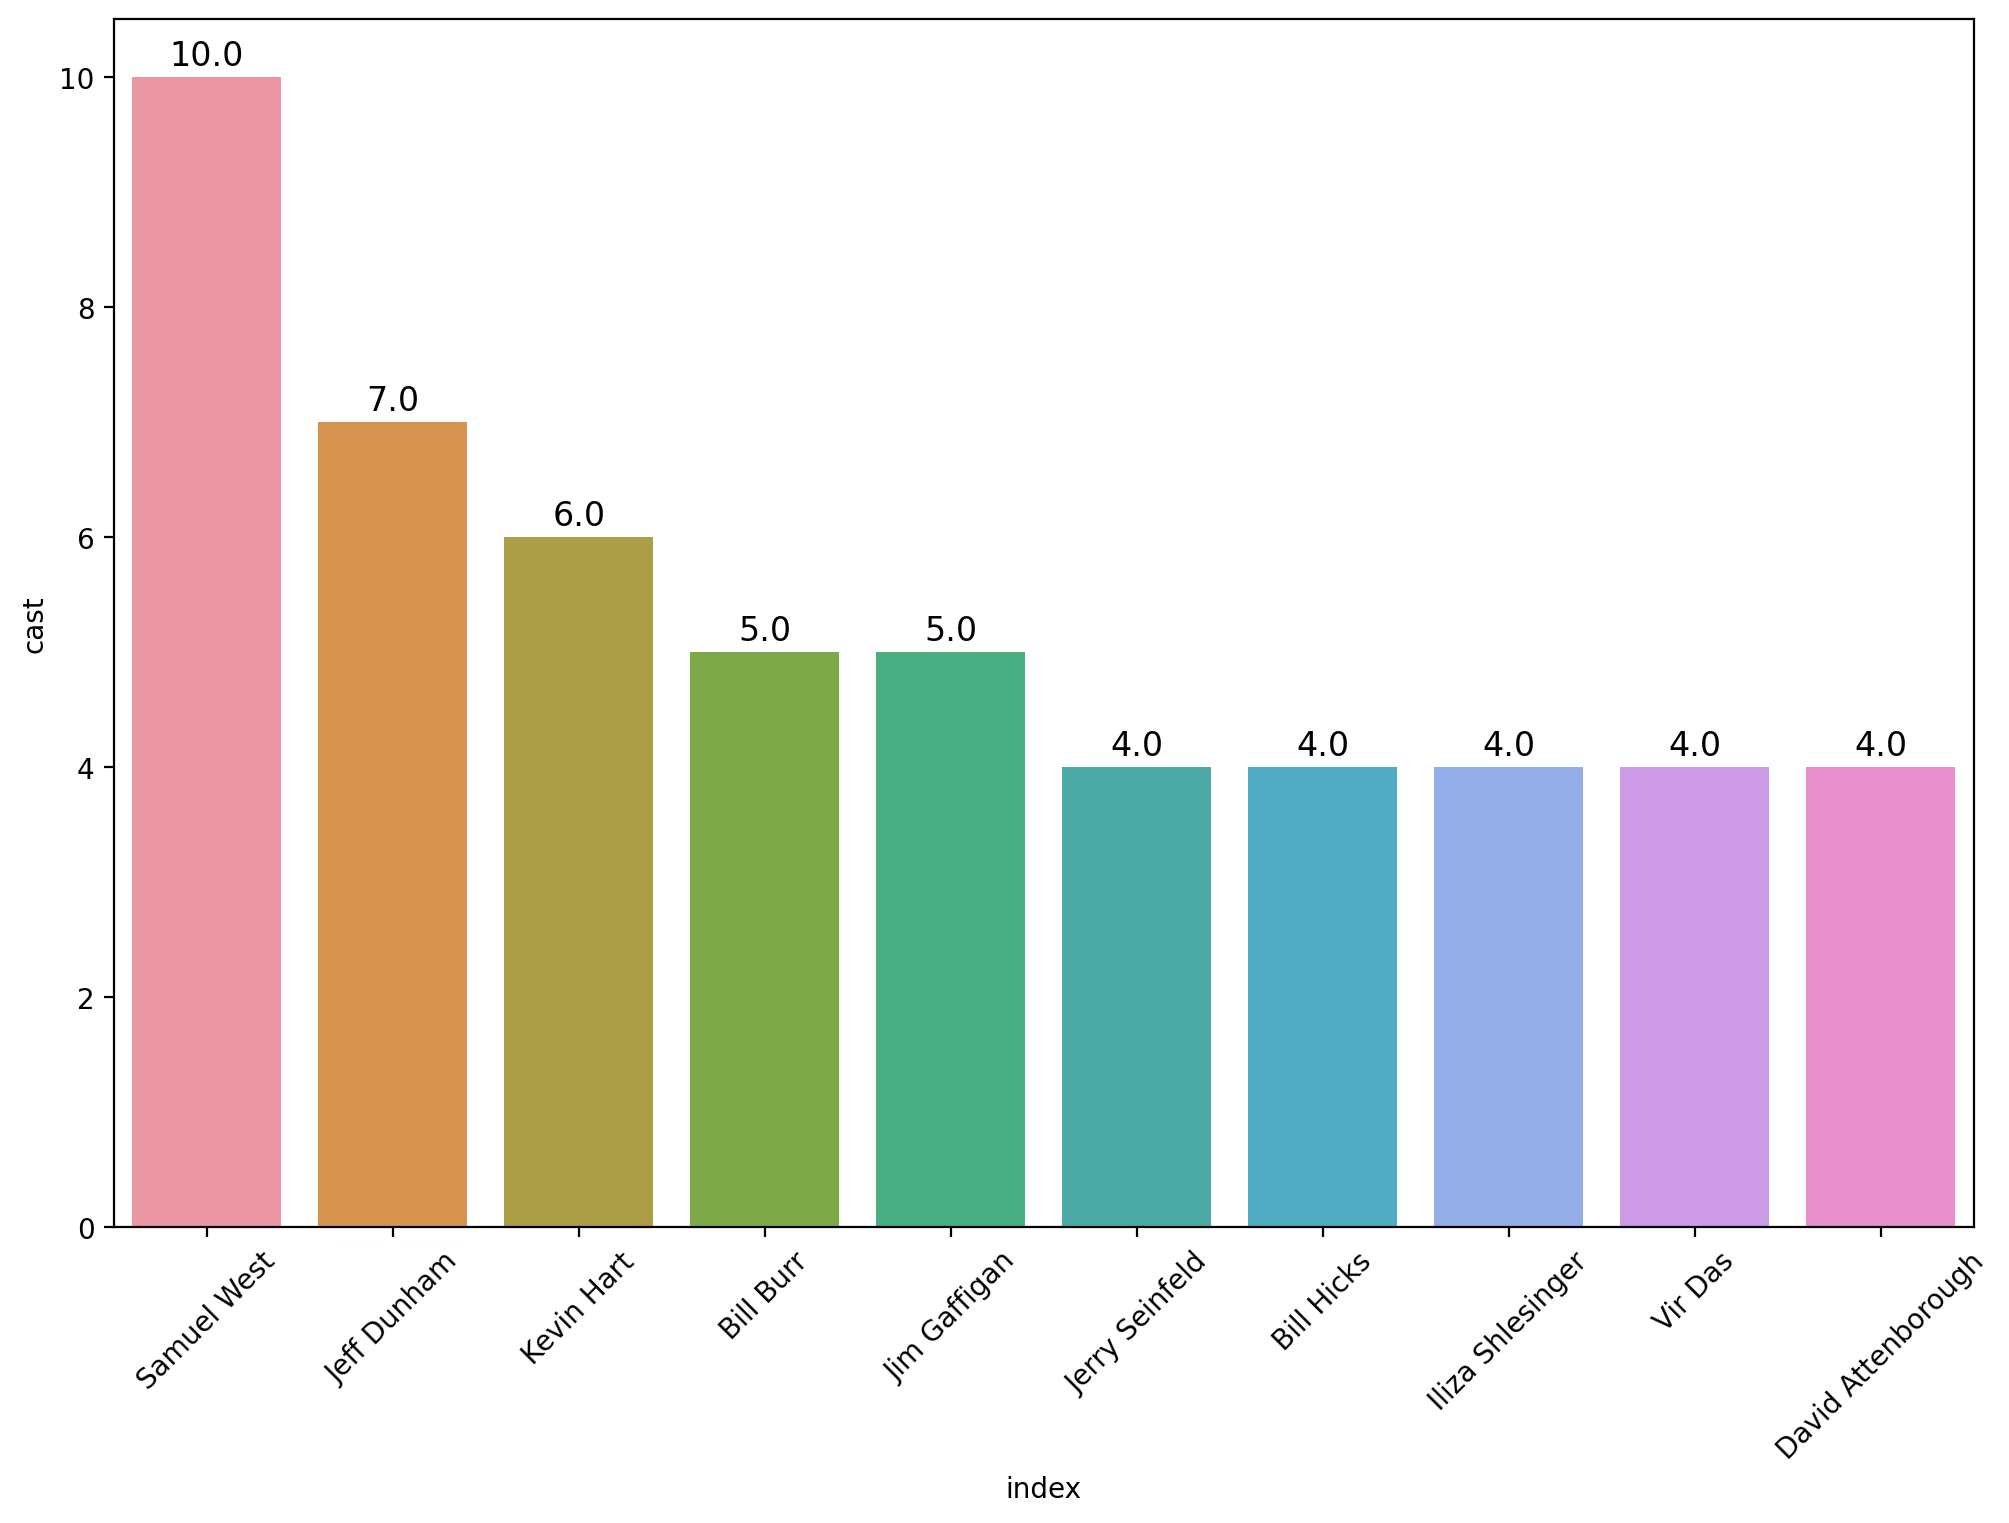

In [568]:
plt.figure(figsize = (12,8), dpi=200)
graph= sns.barplot(data= cast.head(10), x='index', y='cast')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height+0.1 , height , ha="center", fontsize=12)
plt.xticks(rotation= 45)

### Distribution of Movies Over the years

In [582]:
movie= movies_df.query('type=="Movie"')

In [576]:
count= movie.release_year.value_counts(ascending=False).reset_index()

Text(0.5, 1.0, 'distribution of movies over the years')

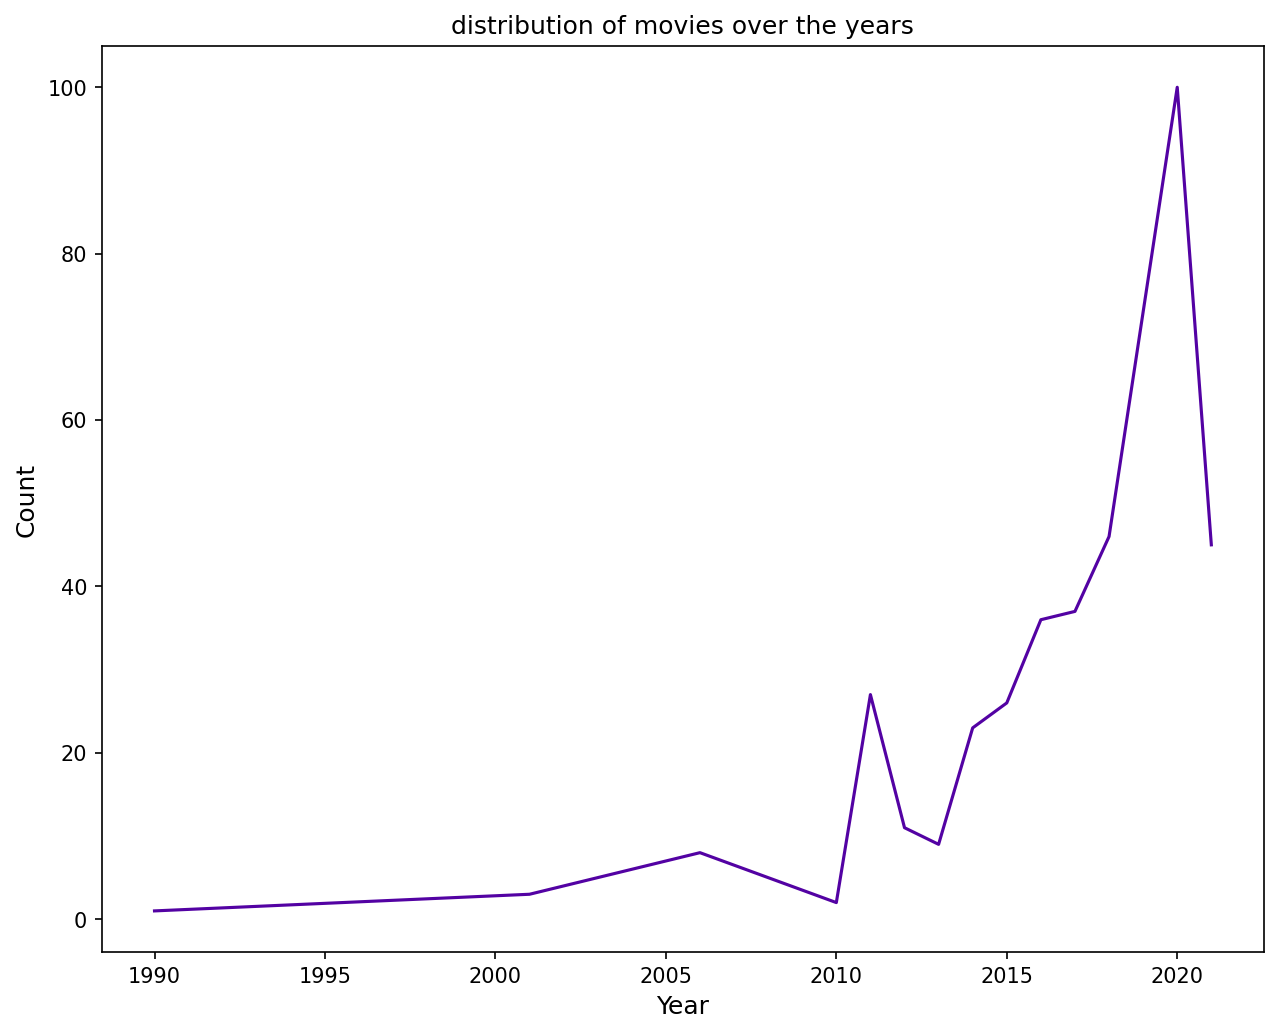

In [589]:
plt.figure(figsize=(10,8), dpi=150)
sns.lineplot(data= count, x='index', y='release_year')
plt.xlabel('Year', size= 12)
plt.ylabel('Count', size= 12)
plt.title('distribution of movies over the years', size= 12)

### Distribution of Tv show Over the years

In [583]:
tvshow= movies_df.query('type=="TV Show"')

In [584]:
count= tvshow.release_year.value_counts(ascending=False).reset_index()

Text(0.5, 1.0, 'distribution of Tv Shows over the years')

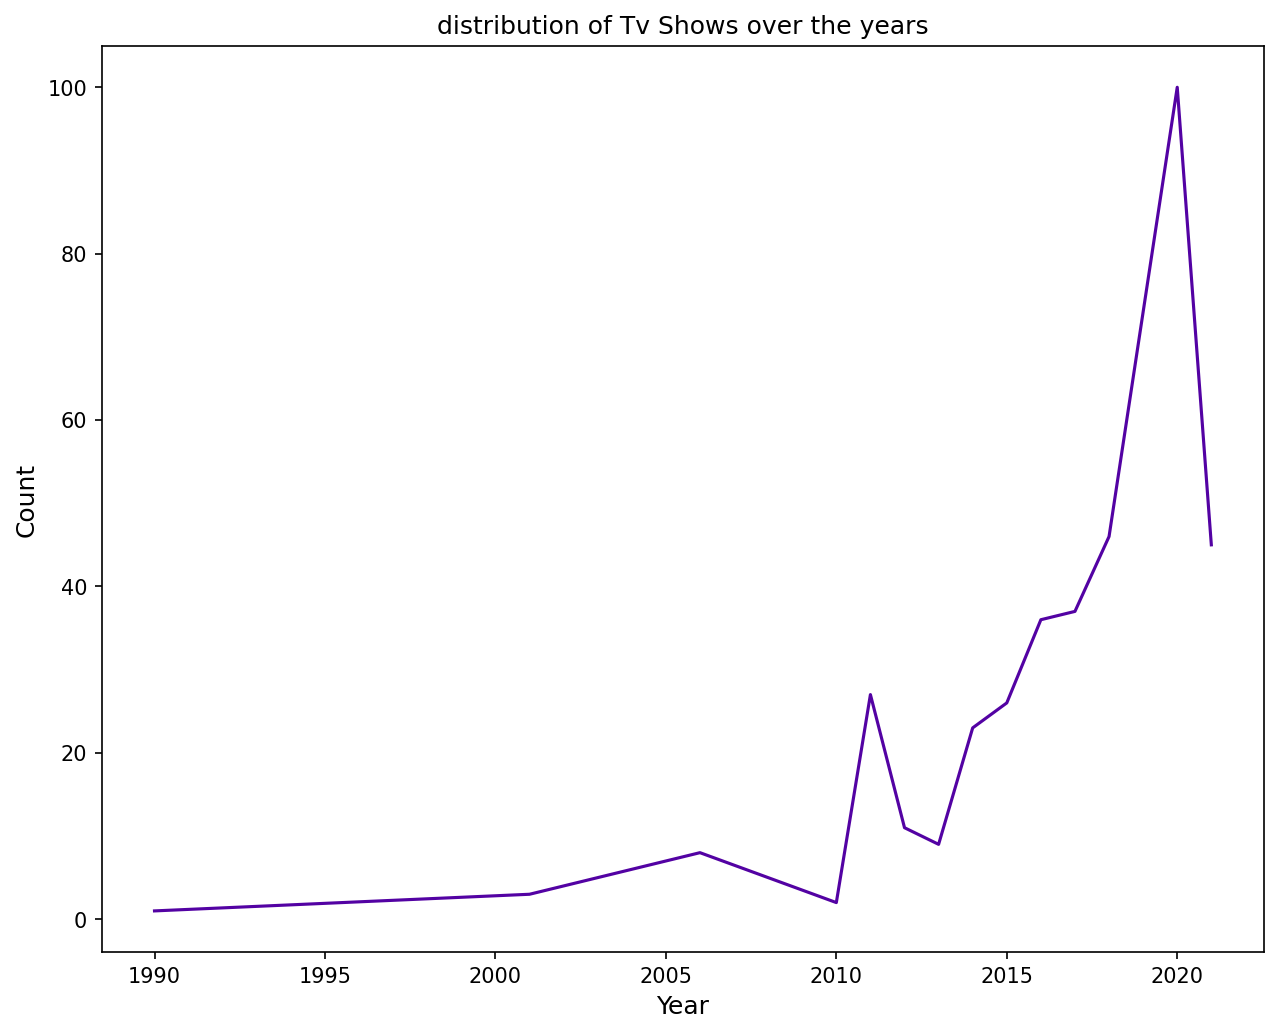

In [588]:
plt.figure(figsize=(10,8), dpi=150)
sns.lineplot(data= count, x='index', y='release_year')
plt.xlabel('Year', size= 12)
plt.ylabel('Count', size= 12)
plt.title('distribution of Tv Shows over the years', size= 12)

### Distribution of movies and tv show in last ten years

In [597]:
moviestvshow = movies_df.query('release_year >= 2010')

In [610]:
moviestvshow= moviestvshow.groupby(['release_year','type'])['country'].count().reset_index()

Text(0.5, 1.0, 'distribution of Tv Shows and movies over the years')

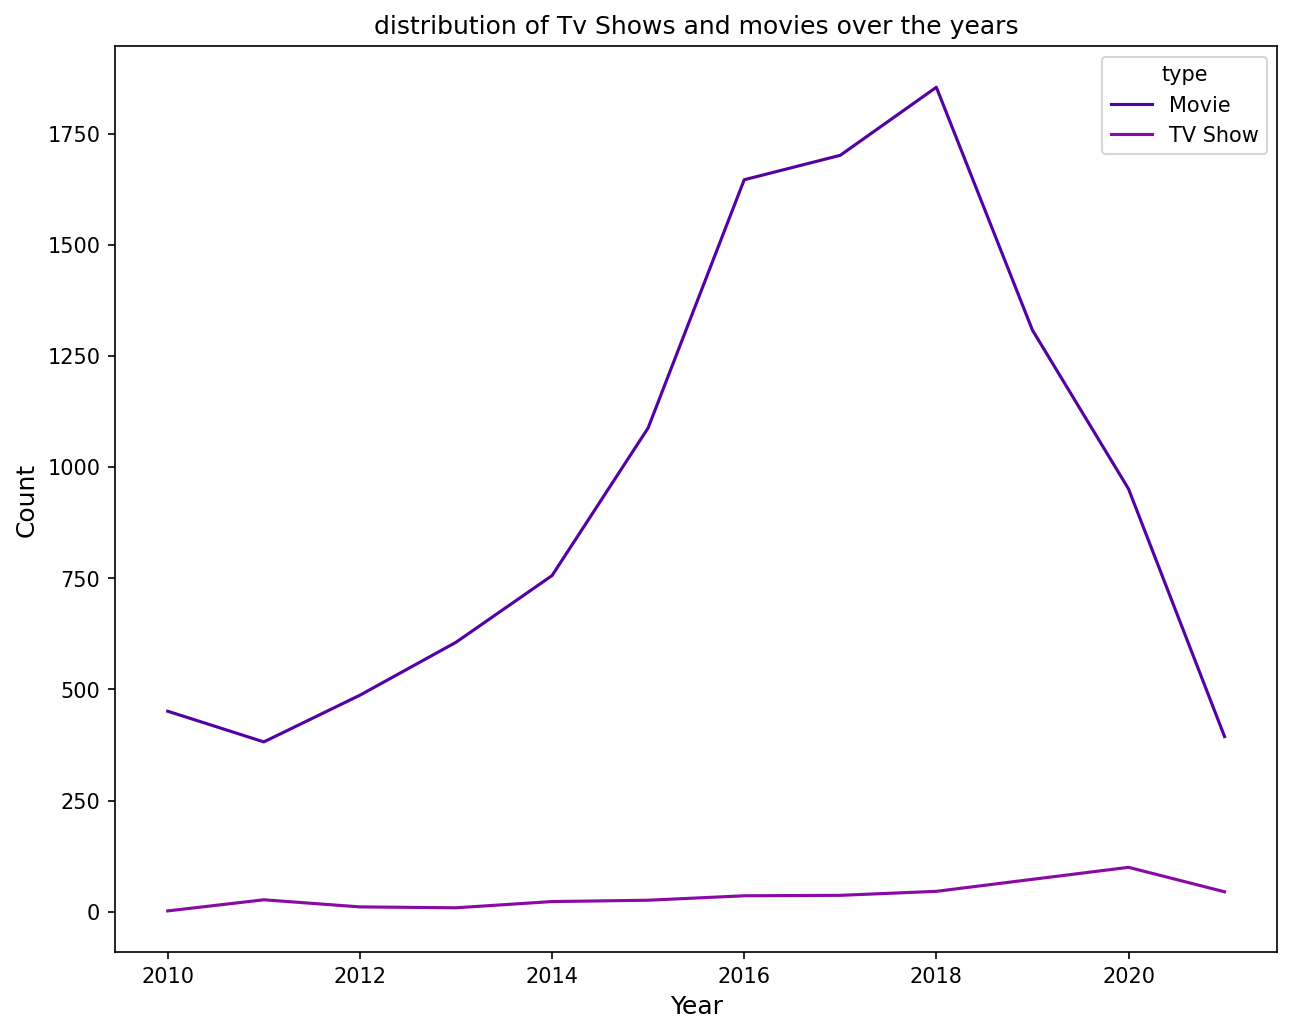

In [613]:
plt.figure(figsize=(10,8), dpi=150)
sns.lineplot(data= moviestvshow, x='release_year', hue='type',y= 'country' )
plt.xlabel('Year', size= 12)
plt.ylabel('Count', size= 12)
plt.title('distribution of Tv Shows and movies over the years', size= 12)


### Total Content Added 

In [675]:
totalcontent= movies_df.query('release_year >= 2010').release_year.value_counts(ascending=False).reset_index()
totalcontent.columns= ['release_year', 'count']

In [676]:
movie= movies_df[(movies_df.type=='Movie') &(movies_df.release_year>=2010)].release_year.value_counts(ascending=False).reset_index()
movie.columns= ['release_year', 'count']

In [677]:
tv= movies_df[(movies_df.type=='TV Show') & (movies_df.release_year>=2010)].release_year.value_counts(ascending=False).reset_index()
tv.columns= ['release_year', 'count']

Text(0, 0.5, 'Number of Content Added')

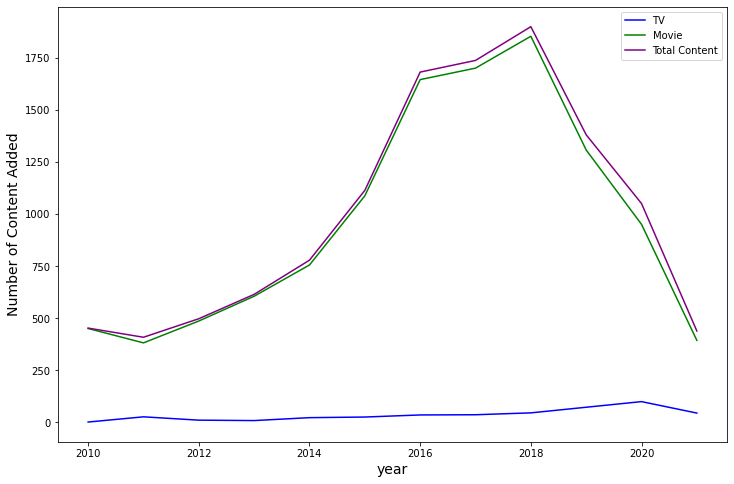

In [688]:
plt.figure(figsize=(12,8))
ax= sns.lineplot(x='release_year', y='count', data=tv, color='blue', label='TV')
ax1 = sns.lineplot(x='release_year', y='count', data=movie, color='green', label='Movie')
ax2= sns.lineplot(x='release_year', y='count', data=totalcontent, color='purple', label='Total Content')
plt.legend()
plt.xlabel('year', size= 14)
plt.ylabel('Number of Content Added', size= 14)

### Word Cloud

In [690]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
movie= movies_df[movies_df.type=='Movie']
tv= movies_df[movies_df.type=='TV Show']                 
description_movies = ''.join(movie['description'])
description_tv  = ''.join(tv['description'])

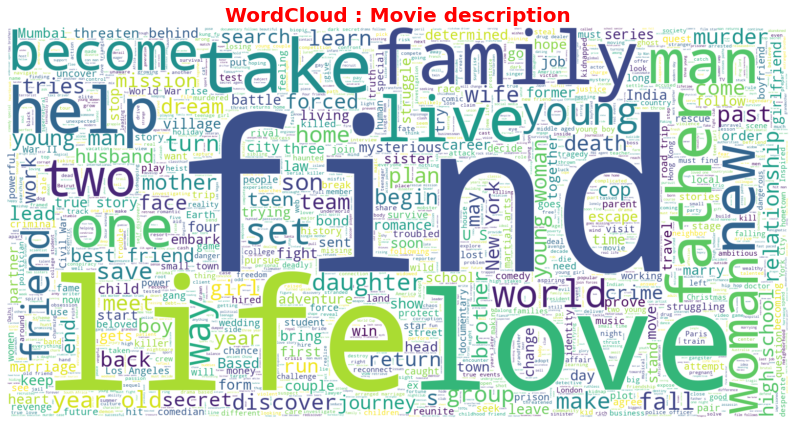

In [693]:
plt.figure(figsize=(14,14))

wordcloud1 = WordCloud(max_words=1000000,background_color="white", width=1600, height=800).generate(description_movies)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud : Movie description', fontsize = 20, color='r', weight='semibold')

plt.show()

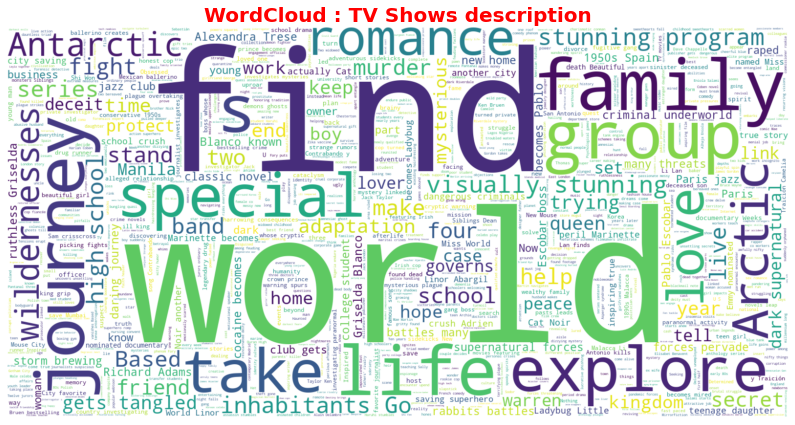

In [694]:
plt.figure(figsize=(14,14))

wordcloud2 = WordCloud(max_words=1000000,background_color="white", width=1600, height=800).generate(description_tv)
plt.imshow(wordcloud2,interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud : TV Shows description', fontsize = 20, color='r', weight='semibold')

plt.show()

### Network Graph 

In [697]:
movies_df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...",United States,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s..."


In [700]:
movies_df['cast']= movies_df['cast'].apply(lambda x : x[0:4])

In [702]:
movies_df= movies_df.explode('cast')

In [705]:
movies_df.cast.nunique() # number of actors

13328

In [706]:
movies_df.director.nunique() # number of directors

3945

In [738]:
movies_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United States,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,Alexandra Duah,United States,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,Nick Medley,United States,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...
s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Vicky Kaushal,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Sarah-Jane Dias,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [750]:
subset=movies_df.groupby(['director','cast'],as_index=False)['title'].count().sort_values('title',ascending=False)

In [748]:
# For network graph to be manageable we only considered director and actor where freq is more than equal to 15

In [751]:
subset= subset.query('title >= 15')

In [756]:
subset.cast.nunique(), subset.director.nunique() # total nodes

(93, 30)

In [757]:
import plotly.graph_objects as go

import networkx as nx

In [758]:
G = nx.Graph()

In [759]:
G= nx.from_pandas_edgelist(subset, source= 'director', target='cast', edge_attr = 'title')

In [760]:
from pyvis.network import Network 

In [761]:
net= Network(notebook=True)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [763]:
net.from_nx(G)
net.show("netflix.html")